# Classification Without PCA (Stellar)

In [27]:
import pandas as pd
import numpy as np
import time

dataset_stellar = pd.read_csv("Stellar//star_classification.csv", delimiter=',')
X = dataset_stellar.loc[: , dataset_stellar.columns != 'class'].values
y = dataset_stellar["class"].values

len(dataset_stellar.columns)

18

In [28]:
np.unique(y, return_counts=True)

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([59445, 18961, 21594]))

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

from sklearn.preprocessing import StandardScaler
scale_obj = StandardScaler()
X = scale_obj.fit_transform(X.astype(float))

from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.15)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=400)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Training time:", end_time - start_time)

Training time: 56.53818187100114


In [31]:
model.score(XTest, yTest)

0.9552

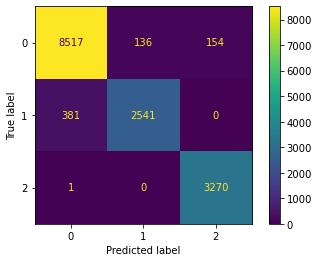

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, XTest, yTest)

# Classification with PCA (Stellar)

In [33]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
XTrain = pca.fit_transform(XTrain)
XTest = pca.transform(XTest)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=400)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Training time:", end_time - start_time)

Training time: 10.03645027800303


In [35]:
model.score(XTest, yTest)

0.9518

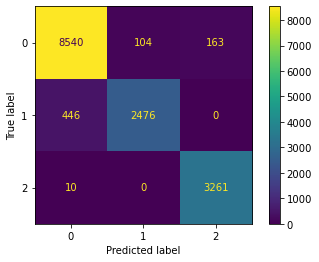

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, XTest, yTest)

## PCA viewer

In [37]:
from sklearn.decomposition import PCA
pca_viewer = PCA(n_components=2)
principal_components = pca_viewer.fit_transform(XTrain)
# Percentage of variance explained for each components
print(pca_viewer.explained_variance_ratio_)

[0.28599366 0.21279696]


In [38]:
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['principal component 1', 'principal component 2'])

principal_components_df

,principal component 1,principal component 2
0,-2.257369,0.227727
1,2.856238,-0.238572
2,-3.982984,0.446322
3,-0.530571,0.015152
4,-0.361219,-0.007442
...,...,...
84995,2.148485,-0.166174
84996,-1.116602,0.049208
84997,3.300166,-0.367974
84998,2.336946,-0.249554


In [39]:
yTrain.astype(int)
yTrain = np.where(yTrain == 0, 'GALAXY', yTrain)
yTrain = np.where(yTrain == 1, 'QSO', yTrain)
yTrain = np.where(yTrain == 2, 'STAR', yTrain)

/tmp/ipykernel_20070/2751838904.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  yTrain = np.where(yTrain == 1, 'QSO', yTrain)
/tmp/ipykernel_20070/2751838904.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  yTrain = np.where(yTrain == 2, 'STAR', yTrain)


<Figure size 432x288 with 0 Axes>

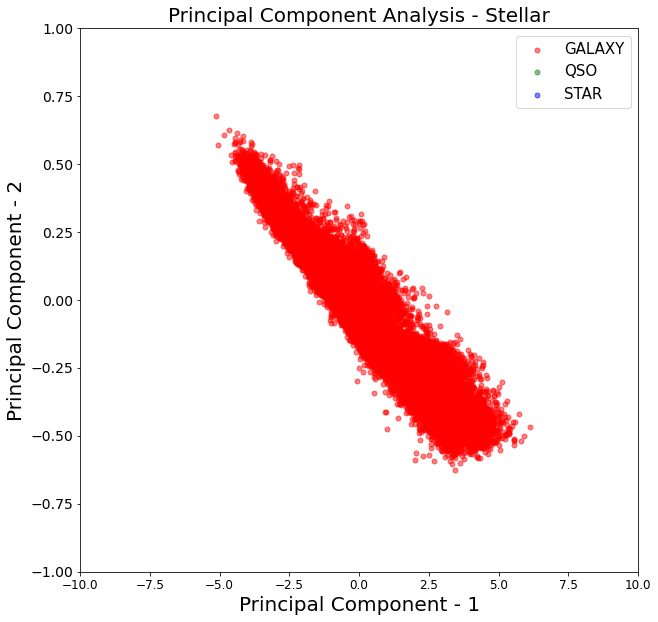

In [40]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.title("Principal Component Analysis - Stellar",fontsize=20)
targets = ['GALAXY', 'QSO', 'STAR']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = yTrain == target
    plt.scatter(principal_components_df.loc[indicesToKeep, 'principal component 1'], 
                principal_components_df.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 25, alpha=0.5)

plt.legend(targets,prop={'size': 15})
plt.show()

## Referências

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://www.geeksforgeeks.org/principal-component-analysis-with-python/
https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17/code
https://www.kaggle.com/iabhishekofficial/mobile-price-classification
https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

# Classification without PCA (Mobile)

In [41]:
import pandas as pd
import numpy as np
import time

dataset_mobile = pd.read_csv("Mobile//train.csv", delimiter=',')
dataset_mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [42]:
X = dataset_mobile.iloc[:,:-1].values
y = dataset_mobile.iloc[:,-1].values

In [43]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3]), array([500, 500, 500, 500]))

In [44]:
from sklearn.preprocessing import StandardScaler
scale_obj = StandardScaler()
XTrain = scale_obj.fit_transform(XTrain.astype(float))
XTest = scale_obj.transform(XTest.astype(float))

from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Training time:", end_time - start_time)

Training time: 2.11706675700043


/home/eduardo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
model.score(XTest, yTest)

0.71

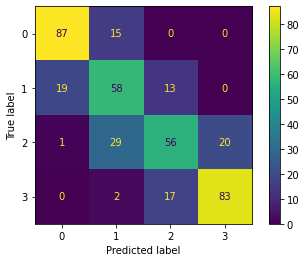

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, XTest, yTest)

# Classification with PCA (Mobile)

In [48]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
XTrain = pca.fit_transform(XTrain)
XTest = pca.transform(XTest)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Training time:", end_time - start_time)

Training time: 1.4395023510005558


/home/eduardo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
model.score(XTest, yTest)

0.955

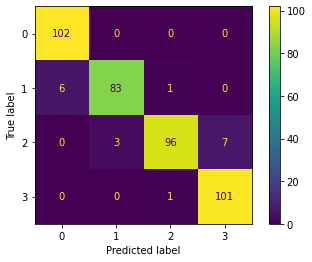

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, XTest, yTest)

## PCA viewer

In [52]:
from sklearn.decomposition import PCA
pca_viewer = PCA(n_components=2)
principal_components = pca_viewer.fit_transform(XTrain)

# Percentage of variance explained for each components
print(pca_viewer.explained_variance_ratio_)

[0.67163667 0.16218472]


In [53]:
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['principal component 1', 'principal component 2'])

principal_components_df

,principal component 1,principal component 2
0,1235.837116,-364.357370
1,-1358.920015,-209.557331
2,-1287.678195,-373.311270
3,1382.018945,-360.673740
4,1115.174572,-644.951329
...,...,...
1595,1281.820564,-604.390035
1596,1375.378399,-513.935818
1597,1005.688946,-403.128648
1598,67.285473,-334.409096


<Figure size 432x288 with 0 Axes>

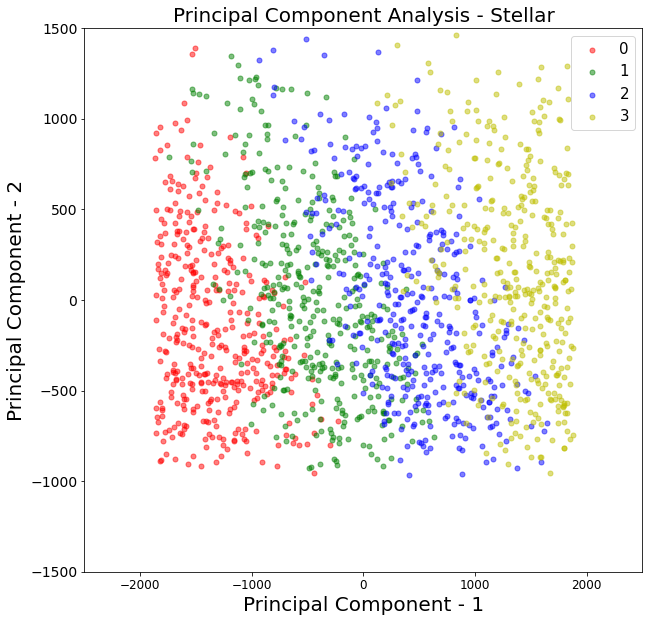

In [54]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.xlim(-2500, 2500)
plt.ylim(-1500, 1500)
plt.title("Principal Component Analysis - Stellar",fontsize=20)
targets = [0, 1, 2, 3]
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indicesToKeep = yTrain == target
    plt.scatter(principal_components_df.loc[indicesToKeep, 'principal component 1'], 
                principal_components_df.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 25, alpha=0.5)

plt.legend(targets,prop={'size': 15})
plt.show()

## References
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://www.geeksforgeeks.org/principal-component-analysis-with-python/

https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17/code

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

